# TrES-3 b Occultation Tests

In [4]:
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
from astropy.time import Time
import astropy.units as u
from astroplan import EclipsingSystem

In [5]:
url = "data/all_lit_times_TrES-3b.csv"

# Read the CSV file directly from the URL
data = pd.read_csv(url)
epochs = np.array(data["Epoch"].astype('int'))
mid_times = np.array(data["Midtime"])
mid_time_errs = np.array(data["Midtime_err_minus_days"])

In [6]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, time_scale='tdb')

In [7]:
ephemeris_obj1 = Ephemeris(timing_obj1)

In [8]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')

In [9]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')

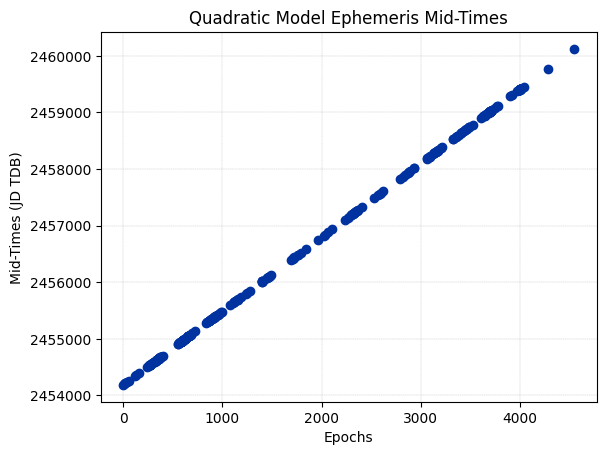

In [10]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

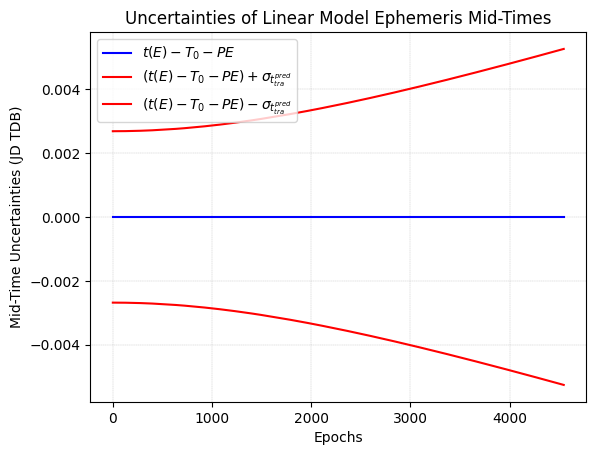

In [11]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)

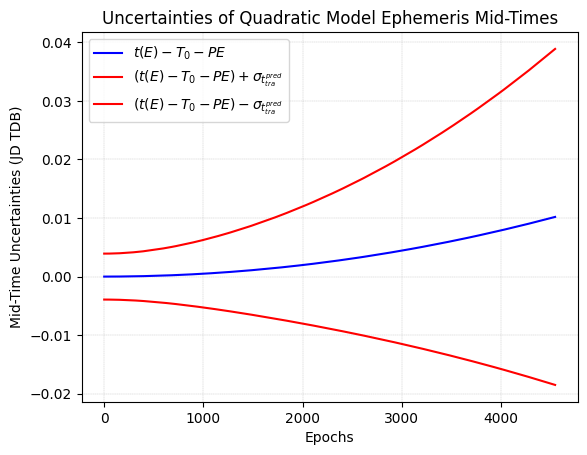

In [12]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)

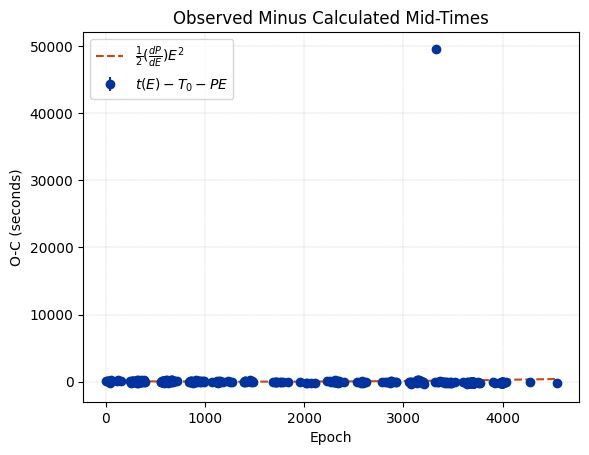

In [13]:
ephemeris_obj1.plot_oc_plot()

In [14]:
apo = Observer.at_site('APO', timezone='US/Mountain')

NameError: name 'Observer' is not defined

In [ ]:
primary_eclipse_time = Time(timing_obj1.mid_times[-1], format='jd')
orbital_period = 1.30618581 * u.day
eclipse_duration = 1.41777456339178 * u.hour

tres_3b = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='TrES-3 b')

In [ ]:
observing_time = Time('2016-01-01 00:00')